In [394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [395]:
df_customer_raw = pd.read_csv('/Users/adaobinwafor/Library/CloudStorage/OneDrive-Personal/ashtonarcher.co/Clients/Riffaut.club/raw_data/riffaut_customers_export_aug2024.csv')

df_orders_raw = pd.read_csv('/Users/adaobinwafor/Library/CloudStorage/OneDrive-Personal/ashtonarcher.co/Clients/Riffaut.club/raw_data/riffaut_orders_export_aug2024.csv')

df_products_raw = pd.read_csv('/Users/adaobinwafor/Library/CloudStorage/OneDrive-Personal/ashtonarcher.co/Clients/Riffaut.club/raw_data/riffaut_products_export_aug2024.csv')

df_transaction_raw = pd.read_csv('/Users/adaobinwafor/Library/CloudStorage/OneDrive-Personal/ashtonarcher.co/Clients/Riffaut.club/raw_data/riffaut_transactions_export_aug2024.csv')

In [396]:
# import copy 

# df_customer_dc = copy.deepcopy(df_customer)
# df_orders_dc = copy.deepcopy(df_orders)
# df_products_dc = copy.deepcopy(df_products)
# df_transactions_dc = copy.deepcopy(df_transactions)

# Preprocessing



### Understanding the Data

In [397]:
df_customer_raw.head()

,Customer ID,First Name,Last Name,Email,Accepts Email Marketing,Default Address Company,Default Address Address1,Default Address Address2,Default Address City,Default Address Province Code,Default Address Country Code,Default Address Zip,Default Address Phone,Phone,Accepts SMS Marketing,Total Spent,Total Orders,Note,Tax Exempt,Tags
0,'7575269212427,Kaarththick,Sivakumar,kaarththicks@hotmail.com,yes,NaN,320 Kenton Lane,NaN,London,ENG,GB,HA3 8RH,'07585550551,'+447585550551,no,0.0,1,NaN,no,NaN
1,'7633574363403,Nina,Devani,nina.devani@gmail.com,yes,NaN,Globe View,Apartment 80,London,ENG,GB,EC4V 3PN,'07913060204,'+447913060204,no,28.0,1,NaN,no,newsletter
2,'7633581867275,NaN,NaN,anoushkadesai@hotmail.com,yes,NaN,NaN,NaN,NaN,NaN,GB,NaN,NaN,NaN,no,0.0,0,NaN,no,newsletter
3,'7633628659979,Ahmad,Abdullah,4medaa@gmail.com,yes,NaN,10a Rockleigh Court,NaN,Brentwood,ENG,GB,CM15 8NH,NaN,NaN,no,56.0,2,NaN,no,newsletter
4,'7633686921483,Harveer,Sanghera,harveysanghera@icloud.com,yes,NaN,"Flat 11 Ashfield court, 287 clapham road",NaN,London,ENG,GB,SW9 9BB,'07805556518,'+447805556518,no,56.0,2,NaN,no,newsletter


In [398]:
df_customer_raw.tail()

,Customer ID,First Name,Last Name,Email,Accepts Email Marketing,Default Address Company,Default Address Address1,Default Address Address2,Default Address City,Default Address Province Code,Default Address Country Code,Default Address Zip,Default Address Phone,Phone,Accepts SMS Marketing,Total Spent,Total Orders,Note,Tax Exempt,Tags
55,'8048478814475,Faraz,Hassan Ali,faraz6@hotmail.co.uk,yes,NaN,"Flat 33, Tiller House",20 Armada Way,London,ENG,GB,E6 7AF,NaN,NaN,no,28.00,1,NaN,no,NaN
56,'8048481632523,Stanisław,Wekwert,awserolo1234@gmail.com,yes,NaN,Radosław 19,Radosław 19,Radosław,NaN,PL,76-230,NaN,NaN,no,34.92,1,NaN,no,NaN
57,'8048899981579,Ronnie,Horton,ronniehorton07@icloud.com,yes,NaN,Bow Meadow Barn,Bow Meadow Lane,Burton-On-Trent,ENG,GB,DE13 8SR,NaN,NaN,no,28.00,1,NaN,no,NaN
58,'8049242833163,Henrique,Medeiros,havscdm@gmail.com,yes,NaN,Alameda 25 De Abril 64 3esq,NaN,Porto,PT-13,PT,4200-525,'934804172,'+351934804172,no,0.00,0,NaN,no,NaN
59,'8078909473035,NaN,NaN,deterrencepayne_06@yahoo.com,yes,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,no,0.00,0,NaN,no,newsletter


In [399]:
df_customer_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer ID                    60 non-null     object 
 1   First Name                     41 non-null     object 
 2   Last Name                      41 non-null     object 
 3   Email                          60 non-null     object 
 4   Accepts Email Marketing        60 non-null     object 
 5   Default Address Company        0 non-null      float64
 6   Default Address Address1       41 non-null     object 
 7   Default Address Address2       13 non-null     object 
 8   Default Address City           41 non-null     object 
 9   Default Address Province Code  37 non-null     object 
 10  Default Address Country Code   59 non-null     object 
 11  Default Address Zip            41 non-null     object 
 12  Default Address Phone          15 non-null     objec

In [400]:
# removing the leading commas in the customer id and phone number
df_customer_raw['Customer ID'] = df_customer_raw['Customer ID'].str.lstrip("'")
df_customer_raw['Phone'] = df_customer_raw['Phone'].str.lstrip("'")

# changing the customer id to string
df_customer_raw['Customer ID'] = df_customer_raw['Customer ID'].astype(str)

# double checkig those changes were made
df_customer_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer ID                    60 non-null     object 
 1   First Name                     41 non-null     object 
 2   Last Name                      41 non-null     object 
 3   Email                          60 non-null     object 
 4   Accepts Email Marketing        60 non-null     object 
 5   Default Address Company        0 non-null      float64
 6   Default Address Address1       41 non-null     object 
 7   Default Address Address2       13 non-null     object 
 8   Default Address City           41 non-null     object 
 9   Default Address Province Code  37 non-null     object 
 10  Default Address Country Code   59 non-null     object 
 11  Default Address Zip            41 non-null     object 
 12  Default Address Phone          15 non-null     objec

In [401]:
df_customer_raw.head()
df_customer_raw.columns

Index(['Customer ID', 'First Name', 'Last Name', 'Email',
       'Accepts Email Marketing', 'Default Address Company',
       'Default Address Address1', 'Default Address Address2',
       'Default Address City', 'Default Address Province Code',
       'Default Address Country Code', 'Default Address Zip',
       'Default Address Phone', 'Phone', 'Accepts SMS Marketing',
       'Total Spent', 'Total Orders', 'Note', 'Tax Exempt', 'Tags'],
      dtype='object')

In [402]:
df_customer = df_customer_raw[['Customer ID', 'First Name', 'Last Name', 'Email',
       'Accepts Email Marketing', 'Phone', 'Accepts SMS Marketing',
       'Total Spent', 'Total Orders', 'Tags']]

df_customer.columns

Index(['Customer ID', 'First Name', 'Last Name', 'Email',
       'Accepts Email Marketing', 'Phone', 'Accepts SMS Marketing',
       'Total Spent', 'Total Orders', 'Tags'],
      dtype='object')

In [403]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [404]:
df_orders_raw.head()

,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Created at,Lineitem quantity,Lineitem name,Lineitem price,Lineitem compare at price,Lineitem sku,Lineitem requires shipping,Lineitem taxable,Lineitem fulfillment status,Billing Name,Billing Street,Billing Address1,Billing Address2,Billing Company,Billing City,Billing Zip,Billing Province,Billing Country,Billing Phone,Shipping Name,Shipping Street,Shipping Address1,Shipping Address2,Shipping Company,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Shipping Phone,Notes,Note Attributes,Cancelled at,Payment Method,Payment Reference,Refunded Amount,Vendor,Outstanding Balance,Employee,Location,Device ID,Id,Tags,Risk Level,Source,Lineitem discount,Tax 1 Name,Tax 1 Value,Tax 2 Name,Tax 2 Value,Tax 3 Name,Tax 3 Value,Tax 4 Name,Tax 4 Value,Tax 5 Name,Tax 5 Value,Phone,Receipt Number,Duties,Billing Province Name,Shipping Province Name,Payment ID,Payment Terms Name,Next Payment Due At,Payment References
0,#|10488|,sagar_gandhi69@hotmail.com,paid,2024-07-16 18:54:17 +0100,fulfilled,2024-07-19 09:53:50 +0100,yes,GBP,28.00,0.00,0.0,28.00,NaN,0.0,Standard,2024-07-16 18:54:17 +0100,1,CHOOSE YOUR FORTUNE T-SHIRT - Medium,28.00,NaN,NaN,True,True,fulfilled,Sagar Gandhi,Falcon Way,Falcon Way,NaN,NaN,Harrow,HA3 0TP,ENG,GB,NaN,Sagar Gandhi,7 Lawn Close,7 Lawn Close,NaN,NaN,"Hillingdon, London",HA4 6ED,ENG,GB,NaN,NaN,NaN,NaN,Shopify Payments,c59939777118475.1,0.0,RIFFAUT CLUB,0.00,NaN,NaN,NaN,6.479467e+12,NaN,Low,web,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,England,England,c59939777118475.1,NaN,NaN,c59939777118475.1
1,#|10478|,4medaa@gmail.com,paid,2024-07-16 09:41:45 +0100,fulfilled,2024-07-19 09:54:54 +0100,yes,GBP,28.00,0.00,0.0,28.00,NaN,0.0,Standard,2024-07-16 09:41:45 +0100,1,CHOOSE YOUR FORTUNE T-SHIRT - Medium,28.00,NaN,NaN,True,True,fulfilled,Ahmad Abdullah,54 Vanbrough Crescent,54 Vanbrough Crescent,NaN,NaN,London,UB5 5JW,ENG,GB,NaN,Ahmad Abdullah,10a Rockleigh Court,10a Rockleigh Court,NaN,NaN,Brentwood,CM15 8NH,ENG,GB,NaN,NaN,NaN,NaN,Shopify Payments,c59928196546827.1,0.0,RIFFAUT CLUB,0.00,NaN,NaN,NaN,6.478360e+12,NaN,Low,web,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,England,England,c59928196546827.1,NaN,NaN,c59928196546827.1
2,#|10468|,awserolo1234@gmail.com,paid,2024-07-14 09:55:20 +0100,fulfilled,2024-07-14 18:06:55 +0100,yes,GBP,28.61,6.31,0.0,34.92,NaN,0.0,Economy International,2024-07-14 09:55:20 +0100,1,CHOOSE YOUR FORTUNE T-SHIRT - Large,28.61,NaN,NaN,True,True,fulfilled,Stanisław Wekwert,"Radosław 19, Radosław 19",Radosław 19,Radosław 19,NaN,Radosław,76-230,NaN,PL,NaN,Stanisław Wekwert,"Radosław 19, Radosław 19",Radosław 19,Radosław 19,NaN,Radosław,76-230,NaN,PL,NaN,NaN,NaN,NaN,Shopify Payments,c59882992533771.1,0.0,RIFFAUT CLUB,-0.01,NaN,NaN,NaN,6.474185e+12,NaN,Low,web,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c59882992533771.1,NaN,NaN,c59882992533771.1
3,#|10458|,ronniehorton07@icloud.com,paid,2024-07-13 20:12:22 +0100,fulfilled,2024-07-14 18:07:31 +0100,yes,GBP,28.00,0.00,0.0,28.00,NaN,0.0,Standard,2024-07-13 20:12:22 +0100,1,CHOOSE YOUR FORTUNE T-SHIRT - Medium,28.00,NaN,NaN,True,True,fulfilled,Ronnie Horton,Bow Meadow Lane,Bow Meadow Lane,NaN,NaN,Burton,DE13 8SR,ENG,GB,NaN,Ronnie Horton,"Bow Meadow Barn, Bow Meadow Lane",Bow Meadow Barn,Bow Meadow Lane,NaN,Burton-On-Trent,DE13 8SR,ENG,GB,NaN,NaN,NaN,NaN,Shopify Payments,rjqUBhwkcPtYZYXgCu0CsRzut,0.0,RIFFAUT CLUB,0.00,NaN,NaN,NaN,6.473534e+12,NaN,Low,web,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,England,England,rjqUBhwkcPtYZYXgCu0CsRzut,NaN,NaN,rjqUBhwkcPtYZYXgCu0CsRzut
4,#|10448|,shaylen26@gmail.com,paid,2024-07-13 16:26:59 +0100,fulfilled,2024-07-22 19:01:42 +0100,yes,GBP,28.00,0.00,0.0,28.00,NaN,0.0,Standard,2024-07-13 16:26:58 +0100,1,CHOOSE YOUR FORTUNE T-SHIRT - Medium,28.00,NaN,NaN,True,True,fulfilled,Shaylen Mistry,42 La

In [405]:
df_orders = df_orders_raw[['Name', 'Email', 'Financial Status', 'Created at', 
                           'Lineitem price', 'Discount Code', 'Discount Amount', 'Shipping Method',
                           'Lineitem quantity', 'Lineitem name', 'Billing Name', 'Cancelled at']]

df_orders.head()

,Name,Email,Financial Status,Created at,Lineitem price,Discount Code,Discount Amount,Shipping Method,Lineitem quantity,Lineitem name,Billing Name,Cancelled at
0,#|10488|,sagar_gandhi69@hotmail.com,paid,2024-07-16 18:54:17 +0100,28.00,NaN,0.0,Standard,1,CHOOSE YOUR FORTUNE T-SHIRT - Medium,Sagar Gandhi,NaN
1,#|10478|,4medaa@gmail.com,paid,2024-07-16 09:41:45 +0100,28.00,NaN,0.0,Standard,1,CHOOSE YOUR FORTUNE T-SHIRT - Medium,Ahmad Abdullah,NaN
2,#|10468|,awserolo1234@gmail.com,paid,2024-07-14 09:55:20 +0100,28.61,NaN,0.0,Economy International,1,CHOOSE YOUR FORTUNE T-SHIRT - Large,Stanisław Wekwert,NaN
3,#|10458|,ronniehorton07@icloud.com,paid,2024-07-13 20:12:22 +0100,28.00,NaN,0.0,Standard,1,CHOOSE YOUR FORTUNE T-SHIRT - Medium,Ronnie Horton,NaN
4,#|10448|,shaylen26@gmail.com,paid,2024-07-13 16:26:58 +0100,28.00,NaN,0.0,Standard,1,CHOOSE YOUR FORTUNE T-SHIRT - Medium,Shaylen Mistry,NaN


In [406]:
df_transaction_raw.head()
# df_transaction_raw['Status'].value_counts()

,Order,Name,Kind,Gateway,Created At,Status,Amount,Currency,Card Type,Payment Method
0,6479467315467,#|10488|,sale,shopify_payments,2024-07-16 18:54:12 +0100,success,28.00,GBP,master,card
1,6478360019211,#|10478|,sale,shopify_payments,2024-07-16 09:41:41 +0100,success,28.00,GBP,visa,card
2,6474185343243,#|10468|,sale,shopify_payments,2024-07-14 09:55:14 +0100,success,34.93,GBP,master,card
3,6473533718795,#|10458|,sale,shopify_payments,2024-07-13 20:12:18 +0100,success,28.00,GBP,visa,card
4,6473203482891,#|10448|,sale,shopify_payments,2024-07-13 16:26:55 +0100,success,28.00,GBP,master,card


In [407]:
df_transactions = df_transaction_raw[['Order', 'Name', 'Created At', 'Amount']]

In [408]:
# The products table  -- This doesnt give usa lot of information at the moment, so I'll ignore it -- for now
# df_products_raw.head()

In [409]:
df_customer.columns

customer_columns = ['Customer ID', 'First Name', 'Last Name', 'Email', 'Phone', 'Total Orders', 'Total Spent',
       'Accepts Email Marketing', 'Accepts SMS Marketing', 'Tags']

df_customer = df_customer[customer_columns]

df_customer.head()

,Customer ID,First Name,Last Name,Email,Phone,Total Orders,Total Spent,Accepts Email Marketing,Accepts SMS Marketing,Tags
0,7575269212427,Kaarththick,Sivakumar,kaarththicks@hotmail.com,+447585550551,1,0.0,yes,no,NaN
1,7633574363403,Nina,Devani,nina.devani@gmail.com,+447913060204,1,28.0,yes,no,newsletter
2,7633581867275,NaN,NaN,anoushkadesai@hotmail.com,NaN,0,0.0,yes,no,newsletter
3,7633628659979,Ahmad,Abdullah,4medaa@gmail.com,NaN,2,56.0,yes,no,newsletter
4,7633686921483,Harveer,Sanghera,harveysanghera@icloud.com,+447805556518,2,56.0,yes,no,newsletter


In [410]:
df_orders.rename(columns={
    'Name':'Order ID',
    'Financial Status': 'Paid',
    'Lineitem price': 'Amount',
    'Created at': 'Invoice Date',
    'Cancelled at': 'Cancelled'

}, inplace=True)


/var/folders/dr/31l8p9993rx44trqbnv8gvm40000gn/T/ipykernel_37940/2027870240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders.rename(columns={


In [411]:
df_orders.columns

Index(['Order ID', 'Email', 'Paid', 'Invoice Date', 'Amount', 'Discount Code',
       'Discount Amount', 'Shipping Method', 'Lineitem quantity',
       'Lineitem name', 'Billing Name', 'Cancelled'],
      dtype='object')

In [412]:

df_orders['Invoice Date'] = pd.to_datetime(df_orders['Invoice Date'], utc=True).dt.tz_localize(None)

order_cols = ['Order ID', 'Email', 'Invoice Date', 'Lineitem name', 'Lineitem quantity', 'Amount', 
              'Billing Name', 'Discount Code', 'Discount Amount', 'Shipping Method', 'Paid', 'Cancelled']

df_orders['Order ID'] = df_orders['Order ID'].str.extract(r'(\d+)')

df_orders = df_orders[order_cols]


/var/folders/dr/31l8p9993rx44trqbnv8gvm40000gn/T/ipykernel_37940/610645205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders['Invoice Date'] = pd.to_datetime(df_orders['Invoice Date'], utc=True).dt.tz_localize(None)
/var/folders/dr/31l8p9993rx44trqbnv8gvm40000gn/T/ipykernel_37940/610645205.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders['Order ID'] = df_orders['Order ID'].str.extract(r'(\d+)')


In [413]:
df_orders[['Product Name', 'Size']] = df_orders['Lineitem name'].str.split(' - ', expand=True)

In [414]:
order_cols = ['Order ID', 'Email', 'Invoice Date', 'Product Name', 'Size',
       'Lineitem quantity', 'Amount', 'Billing Name', 'Discount Code',
       'Discount Amount', 'Shipping Method', 'Paid', 'Cancelled'
       ]

df_orders = df_orders[order_cols]

In [415]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order ID           52 non-null     object        
 1   Email              52 non-null     object        
 2   Invoice Date       52 non-null     datetime64[ns]
 3   Product Name       52 non-null     object        
 4   Size               52 non-null     object        
 5   Lineitem quantity  52 non-null     int64         
 6   Amount             52 non-null     float64       
 7   Billing Name       48 non-null     object        
 8   Discount Code      1 non-null      object        
 9   Discount Amount    48 non-null     float64       
 10  Shipping Method    47 non-null     object        
 11  Paid               48 non-null     object        
 12  Cancelled          2 non-null      object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage:

In [416]:
df_transactions['Name'] = df_transactions['Name'].str.extract(r'(\d+)')

df_transactions.rename(columns={
    'Order': 'ID',
    'Name': 'Order ID',
    'Created At': 'Invoice Date'
}, inplace=True)

df_transactions['Invoice Date'] = pd.to_datetime(df_transactions['Invoice Date'], utc=True).dt.tz_localize(None)


/var/folders/dr/31l8p9993rx44trqbnv8gvm40000gn/T/ipykernel_37940/3248252070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transactions['Name'] = df_transactions['Name'].str.extract(r'(\d+)')
/var/folders/dr/31l8p9993rx44trqbnv8gvm40000gn/T/ipykernel_37940/3248252070.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transactions.rename(columns={
/var/folders/dr/31l8p9993rx44trqbnv8gvm40000gn/T/ipykernel_37940/3248252070.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [417]:
df_orders.columns

Index(['Order ID', 'Email', 'Invoice Date', 'Product Name', 'Size',
       'Lineitem quantity', 'Amount', 'Billing Name', 'Discount Code',
       'Discount Amount', 'Shipping Method', 'Paid', 'Cancelled'],
      dtype='object')

In [418]:
df_transactions.head()

,ID,Order ID,Invoice Date,Amount
0,6479467315467,10488,2024-07-16 17:54:12,28.00
1,6478360019211,10478,2024-07-16 08:41:41,28.00
2,6474185343243,10468,2024-07-14 08:55:14,34.93
3,6473533718795,10458,2024-07-13 19:12:18,28.00
4,6473203482891,10448,2024-07-13 15:26:55,28.00


In [419]:
df_orders.head()

,Order ID,Email,Invoice Date,Product Name,Size,Lineitem quantity,Amount,Billing Name,Discount Code,Discount Amount,Shipping Method,Paid,Cancelled
0,10488,sagar_gandhi69@hotmail.com,2024-07-16 17:54:17,CHOOSE YOUR FORTUNE T-SHIRT,Medium,1,28.00,Sagar Gandhi,NaN,0.0,Standard,paid,NaN
1,10478,4medaa@gmail.com,2024-07-16 08:41:45,CHOOSE YOUR FORTUNE T-SHIRT,Medium,1,28.00,Ahmad Abdullah,NaN,0.0,Standard,paid,NaN
2,10468,awserolo1234@gmail.com,2024-07-14 08:55:20,CHOOSE YOUR FORTUNE T-SHIRT,Large,1,28.61,Stanisław Wekwert,NaN,0.0,Economy International,paid,NaN
3,10458,ronniehorton07@icloud.com,2024-07-13 19:12:22,CHOOSE YOUR FORTUNE T-SHIRT,Medium,1,28.00,Ronnie Horton,NaN,0.0,Standard,paid,NaN
4,10448,shaylen26@gmail.com,2024-07-13 15:26:58,CHOOSE YOUR FORTUNE T-SHIRT,Medium,1,28.00,Shaylen Mistry,NaN,0.0,Standard,paid,NaN


In [420]:
df_customer.head()

,Customer ID,First Name,Last Name,Email,Phone,Total Orders,Total Spent,Accepts Email Marketing,Accepts SMS Marketing,Tags
0,7575269212427,Kaarththick,Sivakumar,kaarththicks@hotmail.com,+447585550551,1,0.0,yes,no,NaN
1,7633574363403,Nina,Devani,nina.devani@gmail.com,+447913060204,1,28.0,yes,no,newsletter
2,7633581867275,NaN,NaN,anoushkadesai@hotmail.com,NaN,0,0.0,yes,no,newsletter
3,7633628659979,Ahmad,Abdullah,4medaa@gmail.com,NaN,2,56.0,yes,no,newsletter
4,7633686921483,Harveer,Sanghera,harveysanghera@icloud.com,+447805556518,2,56.0,yes,no,newsletter


In [421]:
df_customer.nunique()

Customer ID                60
First Name                 41
Last Name                  38
Email                      60
Phone                      16
Total Orders                4
Total Spent                10
Accepts Email Marketing     2
Accepts SMS Marketing       1
Tags                        1
dtype: int64

In [422]:
df_customer.to_excel('df_customers.xlsx', index=False)
df_orders.to_excel('df_orders.xlsx', index=False)
df_transactions.to_excel('df_transactions.xlsx', index=False)

In [423]:
# Merge the customer dataframe with some aspects from orders 
# this will help know when the customers made their purchase

df_customers_full = pd.merge(df_customer[['Customer ID', 'Email']],df_orders, on='Email', how='left')

cols = ['Customer ID', 'Order ID', 'Email', 'Invoice Date', 'Product Name', 'Size',
       'Lineitem quantity', 'Amount', 'Billing Name', 'Discount Code',
       'Discount Amount', 'Shipping Method', 'Paid', 'Cancelled'
       ]

df_customers_full = df_customers_full[cols]

df_customers_full.nunique()

Customer ID          60
Order ID             48
Email                60
Invoice Date         48
Product Name          2
Size                  5
Lineitem quantity     2
Amount                6
Billing Name         38
Discount Code         1
Discount Amount       2
Shipping Method       3
Paid                  2
Cancelled             2
dtype: int64

In [424]:
df_customers_full[df_customers_full['Customer ID'] == '7633574363403']

,Customer ID,Order ID,Email,Invoice Date,Product Name,Size,Lineitem quantity,Amount,Billing Name,Discount Code,Discount Amount,Shipping Method,Paid,Cancelled
1,7633574363403,10058,nina.devani@gmail.com,2024-02-28 21:05:31,MIND OVER MATTER T-SHIRT,Medium,1.0,28.0,Nina Devani,NaN,0.0,Standard,paid,NaN
2,7633574363403,10058,nina.devani@gmail.com,2024-02-28 21:05:31,MIND OVER MATTER T-SHIRT,Small,1.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN


In [425]:
df_orders[df_orders['Order ID'] == '10058']

,Order ID,Email,Invoice Date,Product Name,Size,Lineitem quantity,Amount,Billing Name,Discount Code,Discount Amount,Shipping Method,Paid,Cancelled
46,10058,nina.devani@gmail.com,2024-02-28 21:05:31,MIND OVER MATTER T-SHIRT,Medium,1,28.0,Nina Devani,NaN,0.0,Standard,paid,NaN
47,10058,nina.devani@gmail.com,2024-02-28 21:05:31,MIND OVER MATTER T-SHIRT,Small,1,28.0,NaN,NaN,NaN,NaN,NaN,NaN


In [426]:
df_customers_full.to_excel('df_customers_full.xlsx', index=False)

In [427]:
import copy

df_customer_dc = copy.deepcopy(df_customers_full)
df_orders_dc = copy.deepcopy(df_orders)
df_transactions_dc = copy.deepcopy(df_transactions)

### Understanding some basic metrics

#### customer count, total revenue, new vs returning customers and customer segmentation

In [428]:
total_customers = df_customer_dc['Customer ID'].nunique()

print(f'Total number of customers: {total_customers}')

Total number of customers: 60


In [429]:
total_revenue = df_customer_dc['Amount'].sum()
print(f'Total Revenue: £{total_revenue:.2f}')

Total Revenue: £1462.72


In [430]:
# # understanding the first purchase of each customer
df_customer_fp = copy.deepcopy(df_customer_dc)
df_customer_fp['First Purchase Date'] = df_customer_fp.groupby('Customer ID')['Invoice Date'].transform('min')

df_customer_fp['Returning Customer'] = np.where(df_customer_fp['Invoice Date'] == df_customer_fp['First Purchase Date'], 0, 1 )

df_customer_fp.to_excel('df_customers_full.xlsx', index=False)
df_customer_fp.head()

,Customer ID,Order ID,Email,Invoice Date,Product Name,Size,Lineitem quantity,Amount,Billing Name,Discount Code,Discount Amount,Shipping Method,Paid,Cancelled,First Purchase Date,Returning Customer
0,7575269212427,10018,kaarththicks@hotmail.com,2024-02-26 17:06:39,MIND OVER MATTER T-SHIRT,Extra Small,1.0,28.0,Kaarththick Sivakumar,Test,28.0,NaN,paid,2024-02-27 12:49:49 +0000,2024-02-26 17:06:39,0
1,7633574363403,10058,nina.devani@gmail.com,2024-02-28 21:05:31,MIND OVER MATTER T-SHIRT,Medium,1.0,28.0,Nina Devani,NaN,0.0,Standard,paid,NaN,2024-02-28 21:05:31,0
2,7633574363403,10058,nina.devani@gmail.com,2024-02-28 21:05:31,MIND OVER MATTER T-SHIRT,Small,1.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,2024-02-28 21:05:31,0
3,7633581867275,NaN,anoushkadesai@hotmail.com,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1
4,7633628659979,10478,4medaa@gmail.com,2024-07-16 08:41:45,CHOOSE YOUR FORTUNE T-SHIRT,Medium,1.0,28.0,Ahmad Abdullah,NaN,0.0,Standard,paid,NaN,2024-03-03 14:02:39,1


In [431]:
df_customer_fp['Returning Customer'].value_counts()

Returning Customer
0    41
1    34
Name: count, dtype: int64

## Customer Segmentation

### RFM (Recency, Frequency, Monetary) Segmentation

In [432]:
df_customers_full.head()

,Customer ID,Order ID,Email,Invoice Date,Product Name,Size,Lineitem quantity,Amount,Billing Name,Discount Code,Discount Amount,Shipping Method,Paid,Cancelled
0,7575269212427,10018,kaarththicks@hotmail.com,2024-02-26 17:06:39,MIND OVER MATTER T-SHIRT,Extra Small,1.0,28.0,Kaarththick Sivakumar,Test,28.0,NaN,paid,2024-02-27 12:49:49 +0000
1,7633574363403,10058,nina.devani@gmail.com,2024-02-28 21:05:31,MIND OVER MATTER T-SHIRT,Medium,1.0,28.0,Nina Devani,NaN,0.0,Standard,paid,NaN
2,7633574363403,10058,nina.devani@gmail.com,2024-02-28 21:05:31,MIND OVER MATTER T-SHIRT,Small,1.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN
3,7633581867275,NaN,anoushkadesai@hotmail.com,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7633628659979,10478,4medaa@gmail.com,2024-07-16 08:41:45,CHOOSE YOUR FORTUNE T-SHIRT,Medium,1.0,28.0,Ahmad Abdullah,NaN,0.0,Standard,paid,NaN


In [433]:
df_customers_full['Customer ID'].nunique()

60

In [434]:
df_customers_full[df_customers_full['Customer ID'] == '7963226603787']

,Customer ID,Order ID,Email,Invoice Date,Product Name,Size,Lineitem quantity,Amount,Billing Name,Discount Code,Discount Amount,Shipping Method,Paid,Cancelled
57,7963226603787,NaN,kofi1604@gmail.com,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [435]:
email = 'kofi1604'

if df_customer['Email'].str.contains(email, na=False).any():
    print('found')
else:
    print('not found')
    

found


In [436]:
df_orders[df_orders['Email'].str.contains(email, na=False)]

,Order ID,Email,Invoice Date,Product Name,Size,Lineitem quantity,Amount,Billing Name,Discount Code,Discount Amount,Shipping Method,Paid,Cancelled


In [437]:
reference_dt = df_customers_full['Invoice Date'].max() + pd.DateOffset(1)

reference_dt

Timestamp('2024-07-17 17:54:17')

In [438]:
# Grouping by customer id and calculating the rfm metrics
rfm_table = df_customers_full.groupby('Customer ID').agg({
    'Invoice Date': [
        lambda x: (reference_dt - x.max()).days,  
        'min'
    ],
    # 'Invoice Date':lambda x: x.transform('min'),      # Recency: how recently have they made a purchase
    'Order ID': 'nunique',        # Frequency: how many unique invoices are there (how frequently did they make a purchase)
    'Amount': 'sum'     # Monetary: What is the total amount spent
}).reset_index()


# rename the columns
rfm_table.rename(columns={
    'Invoice Date': 'Recency',
    'Invoice Number': 'Frequency',
    'Amount': 'Monetary'
}, inplace=True)

rfm_table.columns = ['Customer ID', 'Recency', 'First Purchase Date', 'Frequency', 'Monetary']
columns = ['Customer ID', 'First Purchase Date','Recency', 'Frequency', 'Monetary']
rfm_table = rfm_table[columns]
rfm_table = rfm_table.dropna(subset=['First Purchase Date'])

rfm_table.head()

,Customer ID,First Purchase Date,Recency,Frequency,Monetary
0,7575269212427,2024-02-26 17:06:39,142.0,1,28.00
1,7633574363403,2024-02-28 21:05:31,139.0,1,56.00
3,7633628659979,2024-03-03 14:02:39,1.0,2,56.00
4,7633686921483,2024-02-28 20:43:24,20.0,2,56.00
5,7633815929099,2024-02-28 21:36:31,139.0,1,57.52


In [439]:
# Assign Recency Scores (1 = most recent, 4 = least recent)
rfm_table['Recency_Score'] = pd.qcut(rfm_table['Recency'], 4, labels=False) + 1

# Assign Frequency Scores (1 = least frequent, 4 = most frequent)
rfm_table['Frequency_Score'] = pd.qcut(rfm_table['Frequency'].rank(method='first'), 4, labels=False) + 1

# Assign Monetary Scores (1 = least spent, 4 = most spent)
rfm_table['Monetary_Score'] = pd.qcut(rfm_table['Monetary'], 4, labels=False, duplicates='drop') + 1

# Combine R, F, M scores to create RFM Segment
rfm_table['RFM_Segment'] = rfm_table['Recency_Score'].astype(str) + rfm_table['Frequency_Score'].astype(str) + rfm_table['Monetary_Score'].astype(str)
rfm_table.head()

,Customer ID,First Purchase Date,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Segment
0,7575269212427,2024-02-26 17:06:39,142.0,1,28.00,4,1,1,411
1,7633574363403,2024-02-28 21:05:31,139.0,1,56.00,4,1,1,411
3,7633628659979,2024-03-03 14:02:39,1.0,2,56.00,1,3,1,131
4,7633686921483,2024-02-28 20:43:24,20.0,2,56.00,2,4,1,241
5,7633815929099,2024-02-28 21:36:31,139.0,1,57.52,4,1,2,412


In [440]:
rfm_table.to_excel('rfm_table.xlsx', index=False)

### Customer lifetime Value

In [441]:
total_orders = df_customers_full['Order ID'].nunique()
avg_purchase_value = total_revenue/total_orders
print(f'Average purchase value: £{avg_purchase_value:.2f}')


# calculate the average purchase frequency rate (apfr)
avg_purchase_frequency_rate = total_orders/total_customers
print(f'The average purchase frequency rate: {avg_purchase_frequency_rate:.2f}')

# calculate the customer value
customer_value = avg_purchase_value * avg_purchase_frequency_rate
print(f'Customer value: £{customer_value:.2f}')

# calculate the average customer lifespan (acl)
customer_lifetimes = df_customers_full.groupby('Customer ID')['Invoice Date'].apply(
    lambda x: (x.max() - x.min()).days
)
avg_customer_lifespan = customer_lifetimes.mean()/365   

# calculate the customer lifetime value
cltv = customer_value * avg_customer_lifespan

print(f'Customer Lifetime Value: £{cltv:.2f}')


Average purchase value: £30.47
The average purchase frequency rate: 0.80
Customer value: £24.38
Customer Lifetime Value: £2.10


In [442]:
customer_agg = df_customers_full.groupby('Customer ID').agg({
    'Invoice Date': [
        lambda x: x.max(), lambda x: x.min()
        ],
    # 'Invoice Date':lambda x: x.transform('min'),      # Recency: how recently have they made a purchase
    'Order ID': 'nunique',        # Frequency: how many unique invoices are there (how frequently did they make a purchase)
    'Amount': 'sum'     # Monetary: What is the total amount spent
}).reset_index()

# customer_agg['Invoice Date'] = pd.to_datetime(customer_agg['Invoice Date'])
customer_agg.columns = ['Customer ID', 'Last Purchase Date', 'First Purchase Date', 'Total Orders', 'Total Revenue']

# Step 2: Calculate the Average Purchase Value (APV) and Average Purchase Frequency Rate (APFR) for each customer
customer_agg['Average Order Value'] = customer_agg['Total Revenue'] / customer_agg['Total Orders']
customer_agg['Average Purchase Frequency Rate'] = customer_agg['Total Orders'] / customer_agg.shape[0]

# Step 3: Calculate the Customer Value (CV)
customer_agg['Customer Value'] = customer_agg['Average Order Value'] * customer_agg['Average Purchase Frequency Rate']

# Step 4: Calculate the Customer Lifespan (in days) and convert to years
customer_agg['Customer Lifespan (Days)'] = (customer_agg['Last Purchase Date'] - customer_agg['First Purchase Date']).dt.days
customer_agg['Customer Lifespan (Years)'] = customer_agg['Customer Lifespan (Days)'] / 365

# Step 5: Calculate the Customer Lifetime Value (CLTV)
customer_agg['CLTV'] = customer_agg['Customer Value'] * customer_agg['Customer Lifespan (Years)']

customer_agg = customer_agg.dropna(subset=['First Purchase Date'])
customer_agg['Last Purchase Date'] = pd.to_datetime(customer_agg['Last Purchase Date'])
customer_agg['First Purchase Date'] = pd.to_datetime(customer_agg['First Purchase Date'])
customer_agg

,Customer ID,Last Purchase Date,First Purchase Date,Total Orders,Total Revenue,Average Order Value,Average Purchase Frequency Rate,Customer Value,Customer Lifespan (Days),Customer Lifespan (Years),CLTV
0,7575269212427,2024-02-26 17:06:39,2024-02-26 17:06:39,1,28.00,28.00,0.016667,0.466667,0.0,0.000000,0.000000
1,7633574363403,2024-02-28 21:05:31,2024-02-28 21:05:31,1,56.00,56.00,0.016667,0.933333,0.0,0.000000,0.000000
3,7633628659979,2024-07-16 08:41:45,2024-03-03 14:02:39,2,56.00,28.00,0.033333,0.933333,134.0,0.367123,0.342648
4,7633686921483,2024-06-26 19:55:13,2024-02-28 20:43:24,2,56.00,28.00,0.033333,0.933333,118.0,0.323288,0.301735
5,7633815929099,2024-02-28 21:36:31,2024-02-28 21:36:31,1,57.52,57.52,0.016667,0.958667,0.0,0.000000,0.000000
6,7633953292555,2024-06-27 09:53:14,2024-03-17 04:14:38,3,84.00,28.00,0.050000,1.400000,102.0,0.279452,0.391233
8,7634832064779,2024-06-27 10:55:10,2024-03-30 21:01:24,2,56.00,28.00,0.033333,0.933333,88.0,0.241096,0.225023
11,7643654816011,2024-06-26 19:12:34,2024-02-28 21:11:55,2,56.00,28.00,0.033333,0.933333,118.0,0.323288,0.301735
12,7655741784331,2024-03-19 12:09:30,2024-03-19 12:09:30,1,28.00,28.00,0.016667,0.466667,0.0,0.000000,0.000000
14,7680424149259,2024-02-28 20:37:57,2024-02-28 20:37:57,1,28.00,28.00,0.016667,0.466667,0.0,0.000000,0.000000


In [443]:
print(customer_agg.head())
customer_agg.to_excel('customer_lifetime_value.xlsx', index=False)

     Customer ID  Last Purchase Date First Purchase Date  Total Orders  \
0  7575269212427 2024-02-26 17:06:39 2024-02-26 17:06:39             1   
1  7633574363403 2024-02-28 21:05:31 2024-02-28 21:05:31             1   
3  7633628659979 2024-07-16 08:41:45 2024-03-03 14:02:39             2   
4  7633686921483 2024-06-26 19:55:13 2024-02-28 20:43:24             2   
5  7633815929099 2024-02-28 21:36:31 2024-02-28 21:36:31             1   

   Total Revenue  Average Order Value  Average Purchase Frequency Rate  \
0          28.00                28.00                         0.016667   
1          56.00                56.00                         0.016667   
3          56.00                28.00                         0.033333   
4          56.00                28.00                         0.033333   
5          57.52                57.52                         0.016667   

   Customer Value  Customer Lifespan (Days)  Customer Lifespan (Years)  \
0        0.466667                   

### Revenue Metrics

#### Avg order value, revenue distribution, monthly, quarterly, yearly revenue trends etc

In [444]:
# Monthly Revenue
monthly_revenue = df_customers_full.resample('ME', on='Invoice Date')['Amount'].sum().reset_index()

# Quarterly Revenue
quarterly_revenue = df_customers_full.resample('QE', on='Invoice Date')['Amount'].sum().reset_index()

# Yearly Revenue
yearly_revenue = df_customers_full.resample('YE', on='Invoice Date')['Amount'].sum().reset_index()

print(monthly_revenue.head())
print(quarterly_revenue.head())
print(yearly_revenue.head())

  Invoice Date  Amount
0   2024-02-29  421.52
1   2024-03-31  308.00
2   2024-04-30   28.00
3   2024-05-31    0.00
4   2024-06-30  366.08
  Invoice Date  Amount
0   2024-03-31  729.52
1   2024-06-30  394.08
2   2024-09-30  339.12
  Invoice Date   Amount
0   2024-12-31  1462.72


In [445]:
# Export Monthly Revenue Trends
monthly_revenue.to_excel('monthly_revenue_trends.xlsx', index=False)

# Export Quarterly Revenue Trends
quarterly_revenue.to_excel('quarterly_revenue_trends.xlsx', index=False)

# Export Yearly Revenue Trends
yearly_revenue.to_excel('yearly_revenue_trends.xlsx', index=False)

print('Exported all metrics to excel files successfully')

Exported all metrics to excel files successfully


#### Monthly and Quarterly Churn rate

In [446]:
df_customers_full.head()

,Customer ID,Order ID,Email,Invoice Date,Product Name,Size,Lineitem quantity,Amount,Billing Name,Discount Code,Discount Amount,Shipping Method,Paid,Cancelled
0,7575269212427,10018,kaarththicks@hotmail.com,2024-02-26 17:06:39,MIND OVER MATTER T-SHIRT,Extra Small,1.0,28.0,Kaarththick Sivakumar,Test,28.0,NaN,paid,2024-02-27 12:49:49 +0000
1,7633574363403,10058,nina.devani@gmail.com,2024-02-28 21:05:31,MIND OVER MATTER T-SHIRT,Medium,1.0,28.0,Nina Devani,NaN,0.0,Standard,paid,NaN
2,7633574363403,10058,nina.devani@gmail.com,2024-02-28 21:05:31,MIND OVER MATTER T-SHIRT,Small,1.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN
3,7633581867275,NaN,anoushkadesai@hotmail.com,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7633628659979,10478,4medaa@gmail.com,2024-07-16 08:41:45,CHOOSE YOUR FORTUNE T-SHIRT,Medium,1.0,28.0,Ahmad Abdullah,NaN,0.0,Standard,paid,NaN


In [447]:
df_customers_full.columns

Index(['Customer ID', 'Order ID', 'Email', 'Invoice Date', 'Product Name',
       'Size', 'Lineitem quantity', 'Amount', 'Billing Name', 'Discount Code',
       'Discount Amount', 'Shipping Method', 'Paid', 'Cancelled'],
      dtype='object')

In [448]:
df_customer_churn = copy.deepcopy(df_customers_full)

columns = ['Customer ID', 'Invoice Date']
df_customer_churn = df_customer_churn[columns]

df_customer_churn.head()

,Customer ID,Invoice Date
0,7575269212427,2024-02-26 17:06:39
1,7633574363403,2024-02-28 21:05:31
2,7633574363403,2024-02-28 21:05:31
3,7633581867275,NaT
4,7633628659979,2024-07-16 08:41:45


In [449]:
df_customer_churn.sample(5)

,Customer ID,Invoice Date
55,7963006009611,2024-07-08 10:23:56
17,7638754492683,NaT
66,8023574511883,2024-07-03 12:17:15
14,7634832064779,2024-06-27 10:55:10
31,7683989373195,2024-02-29 15:52:59


In [450]:
# monthly and quarterly churn rate
df_customer_churn['Month'] = df_customer_churn['Invoice Date'].dt.to_period('M')
df_customer_churn['Quarter'] = df_customer_churn['Invoice Date'].dt.to_period('Q')

# monthly churn rate
monthly_customers = df_customer_churn.groupby(['Month', 'Customer ID']).size().reset_index(name='Purchases')
quarterly_customers = df_customer_churn.groupby(['Quarter', 'Customer ID']).size().reset_index(name='Purchases')

monthly_customers['Previous Month'] = monthly_customers['Month'].shift(1)
monthly_customers['Churned'] = ~monthly_customers['Customer ID'].isin(monthly_customers[monthly_customers['Month'] == monthly_customers['Previous Month']]['Customer ID'])

monthly_churn_rate = monthly_customers.groupby('Month')['Churned'].mean() * 100

# quarterly churn rate
quarterly_customers['Previous Quarter'] = quarterly_customers['Quarter'].shift(1)
quarterly_customers['Churned'] = ~quarterly_customers['Customer ID'].isin(quarterly_customers[quarterly_customers['Quarter'] == quarterly_customers['Previous Quarter']]['Customer ID'])

quarterly_churn_rate = quarterly_customers.groupby('Quarter')['Churned'].mean() * 100

In [451]:
monthly_churn_rate = monthly_churn_rate.reset_index()

monthly_churn_rate = pd.DataFrame(monthly_churn_rate)
monthly_churn_rate

,Month,Churned
0,2024-02,7.692308
1,2024-03,9.090909
2,2024-04,0.000000
3,2024-06,0.000000
4,2024-07,9.090909


In [452]:
# Example: Convert PeriodDtype to timestamp
if isinstance(monthly_churn_rate.index, pd.PeriodIndex):
    monthly_churn_rate.index = monthly_churn_rate.index.to_timestamp()


monthly_churn_rate

,Month,Churned
0,2024-02,7.692308
1,2024-03,9.090909
2,2024-04,0.000000
3,2024-06,0.000000
4,2024-07,9.090909


In [453]:
monthly_churn_rate.to_excel('customer_monthly_churn_rate.xlsx', index=False)

In [454]:
quarterly_churn_rate

Quarter
2024Q1    4.166667
2024Q2    0.000000
2024Q3    0.000000
Freq: Q-DEC, Name: Churned, dtype: float64

In [455]:
quarterly_churn_rate = quarterly_churn_rate.reset_index()

quarterly_churn_rate = pd.DataFrame(quarterly_churn_rate)
if isinstance(quarterly_churn_rate.index, pd.PeriodIndex):
    quarterly_churn_rate.index = quarterly_churn_rate.index.to_timestamp()
quarterly_churn_rate
quarterly_churn_rate.to_excel('customer_quarterly_churn_rate.xlsx', index=False)

#### Monthly and Quarterly retention rate

In [456]:
df_customer_churn['Invoice Date'] = pd.to_datetime(df_customer_churn['Invoice Date'])
df_customer_churn['Month'] = df_customer_churn['Invoice Date'].dt.to_period('M')

start_customers = df_customer_churn.groupby('Month')['Customer ID'].nunique()
df_customer_churn['Next Month'] = df_customer_churn['Month'].shift(-1)

retained_cust = df_customer_churn[df_customer_churn['Month'] == df_customer_churn['Next Month']].groupby('Month')['Customer ID'].nunique()

summary_month = pd.DataFrame({
    'Start Customers': start_customers,
    'Retained Customers': retained_cust
}).fillna(0).astype(int)  # Fill NA values and convert to integer

# Calculate Retention Rate
summary_month['Retention Rate'] = (summary_month['Retained Customers'] / summary_month['Start Customers']) * 100

# Reset index to have Month as a column
summary_month = summary_month.reset_index()

# retained_customers_month = df_customer_churn.groupby('Month')['Customer ID'].nunique()
# retained_customers_prev_month = retained_customers_month.shift(1)

# total_customers_month = df_customer_churn.groupby('Customer ID')['Month'].transform('nunique')

# customer_reten_rate_month = (retained_customers_month/retained_customers_prev_month) * 100
# customer_reten_rate_month

df_retention_month = copy.deepcopy(summary_month)
df_retention_month

,Month,Start Customers,Retained Customers,Retention Rate
0,2024-02,13,9,69.230769
1,2024-03,11,3,27.272727
2,2024-04,1,0,0.000000
3,2024-06,12,4,33.333333
4,2024-07,11,5,45.454545


In [457]:

# df_retention_month = pd.DataFrame({'Month': retained_customers_month.index, 'Customer Retention Rate': customer_reten_rate_month.values})
# df_retention_month.fillna(0, inplace=True)
df_retention_month.to_excel('df_customer_reten_monthly.xlsx', index=False)
df_retention_month


,Month,Start Customers,Retained Customers,Retention Rate
0,2024-02,13,9,69.230769
1,2024-03,11,3,27.272727
2,2024-04,1,0,0.000000
3,2024-06,12,4,33.333333
4,2024-07,11,5,45.454545


In [458]:
df_customer_churn['Invoice Date'] = pd.to_datetime(df_customer_churn['Invoice Date'])
df_customer_churn['Quarter'] = df_customer_churn['Invoice Date'].dt.to_period('Q')

start_customers = df_customer_churn.groupby('Quarter')['Customer ID'].nunique()
df_customer_churn['Next Quarter'] = df_customer_churn['Quarter'].shift(-1)

retained_cust = df_customer_churn[df_customer_churn['Quarter'] == df_customer_churn['Next Quarter']].groupby('Quarter')['Customer ID'].nunique()

summary_quarter = pd.DataFrame({
    'Start Customers': start_customers,
    'Retained Customers': retained_cust
}).fillna(0).astype(int)  # Fill NA values and convert to integer

# Calculate Retention Rate
summary_quarter['Retention Rate'] = (summary_quarter['Retained Customers'] / summary_quarter['Start Customers']) * 100

# Reset index to have Month as a column
summary_quarter = summary_quarter.reset_index()


# retained_customers_quarter = df_customer_churn.groupby('Quarter')['Customer ID'].nunique()
# retained_customers_prev_quarter = retained_customers_quarter.shift(1)

# # total_customers_month = df_customer_churn.groupby('Customer ID')['Month'].transform('nunique')

# customer_reten_rate_quarter = (retained_customers_quarter/retained_customers_prev_quarter) * 100
df_retention_quarter = copy.deepcopy(summary_quarter)
df_retention_quarter

,Quarter,Start Customers,Retained Customers,Retention Rate
0,2024Q1,24,14,58.333333
1,2024Q2,12,5,41.666667
2,2024Q3,11,5,45.454545


In [459]:
# df_retention_quarter = pd.DataFrame({'Quarter': retained_customers_quarter.index, 'Customer Retention Rate': customer_reten_rate_quarter.values})
# df_retention_quarter.fillna(0, inplace=True)
df_retention_quarter.to_excel('df_customer_reten_quarterly.xlsx', index=False)
df_retention_quarter

,Quarter,Start Customers,Retained Customers,Retention Rate
0,2024Q1,24,14,58.333333
1,2024Q2,12,5,41.666667
2,2024Q3,11,5,45.454545


#### Creating RFM categorical segments

In [460]:
rfm_customer_segment = copy.deepcopy(rfm_table)

# Example thresholds for segmenting customers
high_value_threshold = rfm_customer_segment['Monetary'].quantile(0.75)  # Top 25% spenders
low_value_threshold = rfm_customer_segment['Monetary'].quantile(0.25)   # Bottom 25% spenders

# Define a function to classify customers based on Frequency and Monetary value
def classify_customer(row):
    if row['Recency'] > 60:
        return 'Churned'
    elif row['Recency'] > 30 and row['Frequency'] < 3:
        return 'At-Risk'
    elif row['Recency'] <= 15 and row['Frequency'] == 1:
        return 'Newcomer'
    elif row['Frequency'] >= 5 and row['Monetary'] >= high_value_threshold:
        return 'VIP'
    elif row['Frequency'] >= 5 and row['Monetary'] < high_value_threshold:
        return 'Frequent Low Spender'
    elif row['Frequency'] < 5 and row['Monetary'] >= high_value_threshold:
        return 'Infrequent High Spender'
    elif row['Frequency'] >= 3 and row['Monetary'] >= low_value_threshold:
        return 'Potential Loyalist'
    elif row['Frequency'] >= 5 and row['Monetary'] < low_value_threshold:
        return 'Bargain Hunter'
    else:
        return 'Other'


# Apply the classification function to each row in the dataframe
rfm_customer_segment['Customer Segment'] = rfm_customer_segment.apply(classify_customer, axis=1)

# Example output
rfm_customer_segment = rfm_customer_segment[['Customer ID', 'Recency', 'Frequency', 'Monetary', 'Customer Segment']]
rfm_customer_segment['Recency'].fillna(0, inplace=True)
rfm_customer_segment.head()

/var/folders/dr/31l8p9993rx44trqbnv8gvm40000gn/T/ipykernel_37940/33623552.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rfm_customer_segment['Recency'].fillna(0, inplace=True)


,Customer ID,Recency,Frequency,Monetary,Customer Segment
0,7575269212427,142.0,1,28.00,Churned
1,7633574363403,139.0,1,56.00,Churned
3,7633628659979,1.0,2,56.00,Infrequent High Spender
4,7633686921483,20.0,2,56.00,Infrequent High Spender
5,7633815929099,139.0,1,57.52,Churned


In [461]:
rfm_customer_segment[rfm_customer_segment['Customer Segment'] == 'Churned']

,Customer ID,Recency,Frequency,Monetary,Customer Segment
0,7575269212427,142.0,1,28.00,Churned
1,7633574363403,139.0,1,56.00,Churned
5,7633815929099,139.0,1,57.52,Churned
12,7655741784331,120.0,1,28.00,Churned
14,7680424149259,139.0,1,28.00,Churned
15,7680447840523,139.0,1,28.00,Churned
18,7680915636491,139.0,1,28.00,Churned
19,7681337164043,139.0,1,28.00,Churned
20,7683871375627,139.0,1,28.00,Churned
21,7683989373195,139.0,1,28.00,Churned


In [462]:
rfm_customer_segment.to_excel('rfm_customer_segment.xlsx', index=False)

In [463]:
df_customers_full.head()

,Customer ID,Order ID,Email,Invoice Date,Product Name,Size,Lineitem quantity,Amount,Billing Name,Discount Code,Discount Amount,Shipping Method,Paid,Cancelled
0,7575269212427,10018,kaarththicks@hotmail.com,2024-02-26 17:06:39,MIND OVER MATTER T-SHIRT,Extra Small,1.0,28.0,Kaarththick Sivakumar,Test,28.0,NaN,paid,2024-02-27 12:49:49 +0000
1,7633574363403,10058,nina.devani@gmail.com,2024-02-28 21:05:31,MIND OVER MATTER T-SHIRT,Medium,1.0,28.0,Nina Devani,NaN,0.0,Standard,paid,NaN
2,7633574363403,10058,nina.devani@gmail.com,2024-02-28 21:05:31,MIND OVER MATTER T-SHIRT,Small,1.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN
3,7633581867275,NaN,anoushkadesai@hotmail.com,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7633628659979,10478,4medaa@gmail.com,2024-07-16 08:41:45,CHOOSE YOUR FORTUNE T-SHIRT,Medium,1.0,28.0,Ahmad Abdullah,NaN,0.0,Standard,paid,NaN


#### Analysing Product Affinity by customer

In [464]:
product_affinity = df_customers_full.groupby(['Customer ID', 'Product Name']).agg({'Order ID': 'count'}).reset_index()
product_affinity.rename(columns={
    'Order ID': 'Product Purchases Made'
}, inplace=True)

total_purchases_by_cust = df_customers_full.groupby('Customer ID')['Order ID'].count().reset_index()
total_purchases_by_cust.rename(columns={
    'Order ID': 'Total Purchases'
}, inplace=True)

product_affinity = pd.merge(product_affinity, total_purchases_by_cust, on='Customer ID')
product_affinity['Product Affinity'] = product_affinity['Product Purchases Made'] / product_affinity['Total Purchases']

product_affinity.head()

,Customer ID,Product Name,Product Purchases Made,Total Purchases,Product Affinity
0,7575269212427,MIND OVER MATTER T-SHIRT,1,1,1.0
1,7633574363403,MIND OVER MATTER T-SHIRT,2,2,1.0
2,7633628659979,CHOOSE YOUR FORTUNE T-SHIRT,1,2,0.5
3,7633628659979,MIND OVER MATTER T-SHIRT,1,2,0.5
4,7633686921483,CHOOSE YOUR FORTUNE T-SHIRT,1,2,0.5


In [465]:
product_affinity.to_excel('productivity_affinity.xlsx', index=False)

In [466]:
top_10_products = df_customers_full.groupby('Product Name')['Order ID'].count().sort_values(ascending=False).head(10)

product_pairs = df_customers_full.groupby('Order ID')['Product Name'].apply(list)
product_pairs = product_pairs[product_pairs.apply(len) > 1]

pair_affinity = {}
for pair in product_pairs:
    for i in range(len(pair)):
        for j in range(i+1, len(pair)):
            if pair[i] < pair[j]:
                key = (pair[i], pair[j])
            else:
                key = (pair[j], pair[i])
            pair_affinity[key] = pair_affinity.get(key, 0) + 1

pair_affinity_df = pd.DataFrame(list(pair_affinity.items()), columns=['Product_Pair', 'Frequency'])
pair_affinity_df = pair_affinity_df.sort_values('Frequency', ascending=False).head(10)

print(pair_affinity_df)
print('  ')
print(top_10_products)

                                        Product_Pair  Frequency
0  (MIND OVER MATTER T-SHIRT, MIND OVER MATTER T-...          2
1  (CHOOSE YOUR FORTUNE T-SHIRT, CHOOSE YOUR FORT...          2
  
Product Name
MIND OVER MATTER T-SHIRT       27
CHOOSE YOUR FORTUNE T-SHIRT    25
Name: Order ID, dtype: int64


In [467]:
rfm_customer_segment['churn'] = rfm_customer_segment['Customer Segment'].apply(lambda x: 1 if x == 'Churned' else 0)
rfm_customer_segment.head()

,Customer ID,Recency,Frequency,Monetary,Customer Segment,churn
0,7575269212427,142.0,1,28.00,Churned,1
1,7633574363403,139.0,1,56.00,Churned,1
3,7633628659979,1.0,2,56.00,Infrequent High Spender,0
4,7633686921483,20.0,2,56.00,Infrequent High Spender,0
5,7633815929099,139.0,1,57.52,Churned,1


In [468]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, roc_auc_score

# X = rfm_customer_segment[['Customer ID', 'Recency', 'Frequency', 'Monetary']]
# y = rfm_customer_segment['churn']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)

# churn_prob = model.predict_proba(X_test)[:, 1]

In [469]:
# churn_prob

#### Including a customer churn probability into the rfm data

In [470]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined as your features and labels
X = rfm_customer_segment[['Recency', 'Frequency', 'Monetary']]
y = (rfm_customer_segment['Customer Segment'] == 'Churned').astype(int)  # 1 if Churned, else 0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict churn probabilities for the entire dataset (not just test set)
rfm_customer_segment['churn_proba'] = model.predict_proba(X)[:, 1]
rfm_customer_segment.head()

,Customer ID,Recency,Frequency,Monetary,Customer Segment,churn,churn_proba
0,7575269212427,142.0,1,28.00,Churned,1,1.00
1,7633574363403,139.0,1,56.00,Churned,1,0.84
3,7633628659979,1.0,2,56.00,Infrequent High Spender,0,0.00
4,7633686921483,20.0,2,56.00,Infrequent High Spender,0,0.00
5,7633815929099,139.0,1,57.52,Churned,1,0.76


In [471]:

# Override churn probability for customers classified as 'Churned'
# rfm_customer_segment.loc[rfm_customer_segment['Customer Segment'] == 'Churned', 'churn_proba'] = 1.0

# Optionally, reclassify churn risk based on updated probabilities
def classify_churn_proba(proba):
    if proba >= 0.75:
        return 'High Risk'
    elif proba >= 0.5:
        return 'Medium Risk'
    elif proba >= 0.25:
        return 'Low Risk'
    else:
        return 'Very Low Risk'

rfm_customer_segment['churn_risk'] = rfm_customer_segment['churn_proba'].apply(classify_churn_proba)
rfm_customer_segment.head()

,Customer ID,Recency,Frequency,Monetary,Customer Segment,churn,churn_proba,churn_risk
0,7575269212427,142.0,1,28.00,Churned,1,1.00,High Risk
1,7633574363403,139.0,1,56.00,Churned,1,0.84,High Risk
3,7633628659979,1.0,2,56.00,Infrequent High Spender,0,0.00,Very Low Risk
4,7633686921483,20.0,2,56.00,Infrequent High Spender,0,0.00,Very Low Risk
5,7633815929099,139.0,1,57.52,Churned,1,0.76,High Risk


In [472]:
rfm_customer_segment.to_excel('churn_probability_by_customer.xlsx', index=False)

#### Introducing Behavioural Clustering

In [473]:
behavioural_clustering = pd.merge(rfm_customer_segment, product_affinity[['Customer ID', 'Product Affinity']], on='Customer ID', how='left')
behavioural_clustering.head()

,Customer ID,Recency,Frequency,Monetary,Customer Segment,churn,churn_proba,churn_risk,Product Affinity
0,7575269212427,142.0,1,28.0,Churned,1,1.00,High Risk,1.0
1,7633574363403,139.0,1,56.0,Churned,1,0.84,High Risk,1.0
2,7633628659979,1.0,2,56.0,Infrequent High Spender,0,0.00,Very Low Risk,0.5
3,7633628659979,1.0,2,56.0,Infrequent High Spender,0,0.00,Very Low Risk,0.5
4,7633686921483,20.0,2,56.0,Infrequent High Spender,0,0.00,Very Low Risk,0.5


##### checking for data skewness/outliers

In [474]:
from scipy.stats import skew


# Calculate skewness
recency_skew = skew(rfm_table['Recency'])
frequency_skew = skew(rfm_table['Frequency'])
monetary_skew = skew(rfm_table['Monetary'])

print(f"Recency Skewness: {recency_skew}")
print(f"Frequency Skewness: {frequency_skew}")
print(f"Monetary Skewness: {monetary_skew}")


Recency Skewness: 0.479071853833817
Frequency Skewness: 1.4730943433617691
Monetary Skewness: 0.8749638477237673


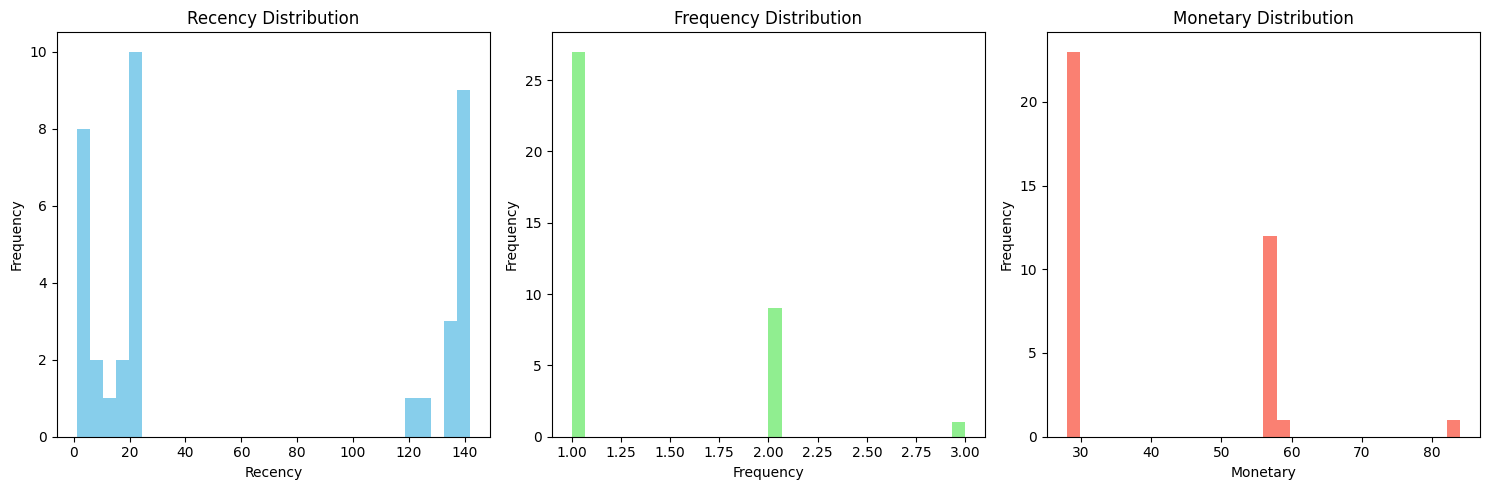

In [475]:
import matplotlib.pyplot as plt

# Plot histograms
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(rfm_table['Recency'], bins=30, color='skyblue')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(rfm_table['Frequency'], bins=30, color='lightgreen')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(rfm_table['Monetary'], bins=30, color='salmon')
plt.title('Monetary Distribution')
plt.xlabel('Monetary')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


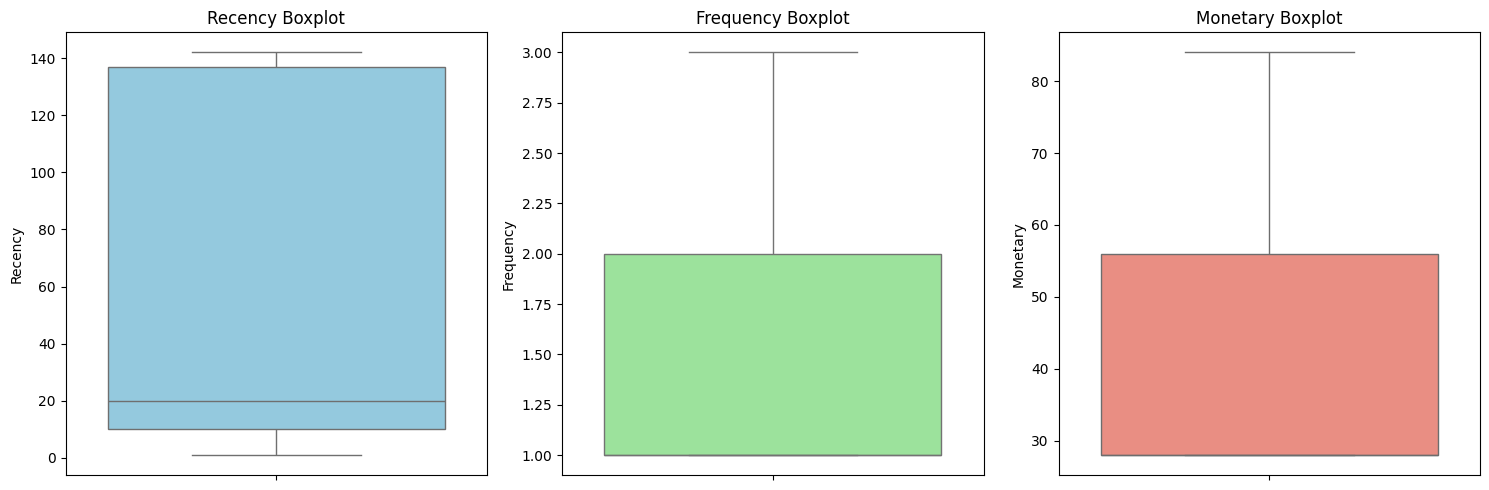

In [476]:
import seaborn as sns

# Plot boxplots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=rfm_table['Recency'], color='skyblue')
plt.title('Recency Boxplot')

plt.subplot(1, 3, 2)
sns.boxplot(y=rfm_table['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')

plt.subplot(1, 3, 3)
sns.boxplot(y=rfm_table['Monetary'], color='salmon')
plt.title('Monetary Boxplot')

plt.tight_layout()
plt.show()

In [477]:
# Define a function to detect outliers using IQR
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Detect outliers for Recency, Frequency, and Monetary
recency_outliers = detect_outliers(rfm_table['Recency'])
frequency_outliers = detect_outliers(rfm_table['Frequency'])
monetary_outliers = detect_outliers(rfm_table['Monetary'])

print(f"Recency Outliers: {len(recency_outliers)}")
print(f"Frequency Outliers: {len(frequency_outliers)}")
print(f"Monetary Outliers: {len(monetary_outliers)}")


Recency Outliers: 0
Frequency Outliers: 0
Monetary Outliers: 0


In [478]:
print(rfm_customer_segment.dtypes)

Customer ID          object
Recency             float64
Frequency             int64
Monetary            float64
Customer Segment     object
churn                 int64
churn_proba         float64
churn_risk           object
dtype: object


In [479]:
rfm_customer_segment['Recency'] = pd.to_numeric(rfm_customer_segment['Recency'], errors='coerce')
rfm_customer_segment['Frequency'] = pd.to_numeric(rfm_customer_segment['Frequency'], errors='coerce')
rfm_customer_segment['Monetary'] = pd.to_numeric(rfm_customer_segment['Monetary'], errors='coerce')


In [480]:
print(rfm_customer_segment.isnull().sum())


Customer ID         0
Recency             0
Frequency           0
Monetary            0
Customer Segment    0
churn               0
churn_proba         0
churn_risk          0
dtype: int64


In [481]:
import numpy as np
rfm_customer_segment['Log_Recency'] = np.log1p(rfm_customer_segment['Recency'])  # log1p handles log(0) cases
rfm_customer_segment['Log_Frequency'] = np.log1p(rfm_customer_segment['Frequency'])
rfm_customer_segment['Log_Monetary'] = np.log1p(rfm_customer_segment['Monetary'])


In [482]:
from sklearn.preprocessing import StandardScaler

# Standardize the log-transformed RFM data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_customer_segment[['Log_Recency', 'Log_Frequency', 'Log_Monetary']])


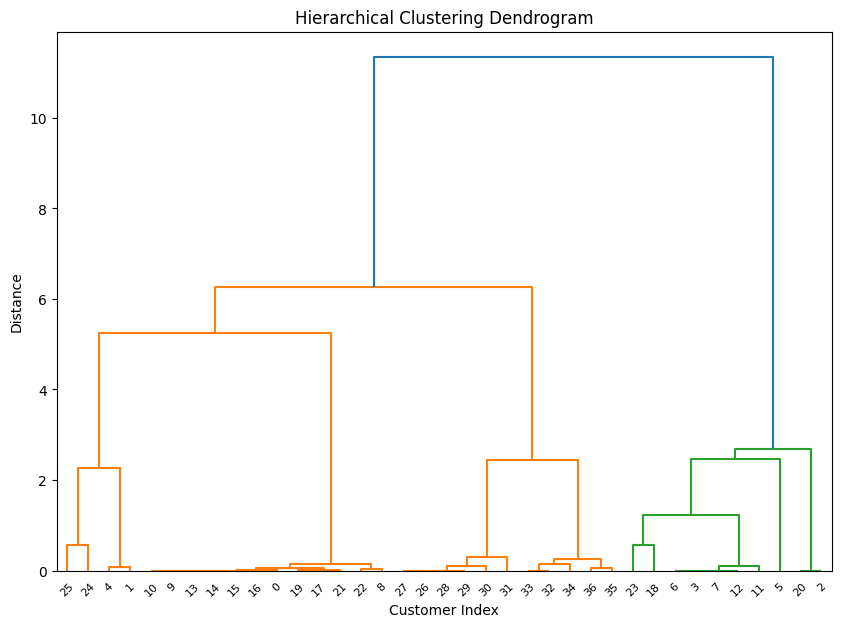

In [483]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical/agglomerative clustering
linked = linkage(rfm_scaled, method='ward')  # 'ward' minimizes the variance within clusters

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()


In [484]:
from scipy.cluster.hierarchy import fcluster

# Choose a cutoff value or number of clusters
max_d = 7.5  # example value for distance; adjust based on dendrogram
clusters = fcluster(linked, max_d, criterion='distance')

# Or determine the number of clusters:
n_clusters = 4
clusters = fcluster(linked, n_clusters, criterion='maxclust')

# Add the cluster labels to your RFM table
rfm_customer_segment['Cluster_heir'] = clusters


In [485]:
rfm_summary = rfm_customer_segment.groupby('Cluster_heir')[['Recency', 'Frequency', 'Monetary']].mean()

In [486]:
rfm_summary

,Recency,Frequency,Monetary
Cluster_heir,,,
1,13.400000,2.1,58.800000
2,11.818182,1.0,28.283636
3,135.666667,1.0,28.000000
4,77.000000,1.0,56.900000


In [487]:
cluster_labels = {
    1: 'VIPs',
    2: 'New Customers',
    3: 'Churned',
    4: 'Lapsed Customers',
}

rfm_customer_segment['Cluster_Heir_Label'] = rfm_customer_segment['Cluster_heir'].apply(lambda x: cluster_labels[x])
rfm_customer_segment.head()

,Customer ID,Recency,Frequency,Monetary,Customer Segment,churn,churn_proba,churn_risk,Log_Recency,Log_Frequency,Log_Monetary,Cluster_heir,Cluster_Heir_Label
0,7575269212427,142.0,1,28.00,Churned,1,1.00,High Risk,4.962845,0.693147,3.367296,3,Churned
1,7633574363403,139.0,1,56.00,Churned,1,0.84,High Risk,4.941642,0.693147,4.043051,4,Lapsed Customers
3,7633628659979,1.0,2,56.00,Infrequent High Spender,0,0.00,Very Low Risk,0.693147,1.098612,4.043051,1,VIPs
4,7633686921483,20.0,2,56.00,Infrequent High Spender,0,0.00,Very Low Risk,3.044522,1.098612,4.043051,1,VIPs
5,7633815929099,139.0,1,57.52,Churned,1,0.76,High Risk,4.941642,0.693147,4.069369,4,Lapsed Customers


In [488]:
from sklearn.cluster import KMeans

rfm_scaled_kmeans = scaler.fit_transform(rfm_customer_segment[['Recency', 'Frequency', 'Monetary']])

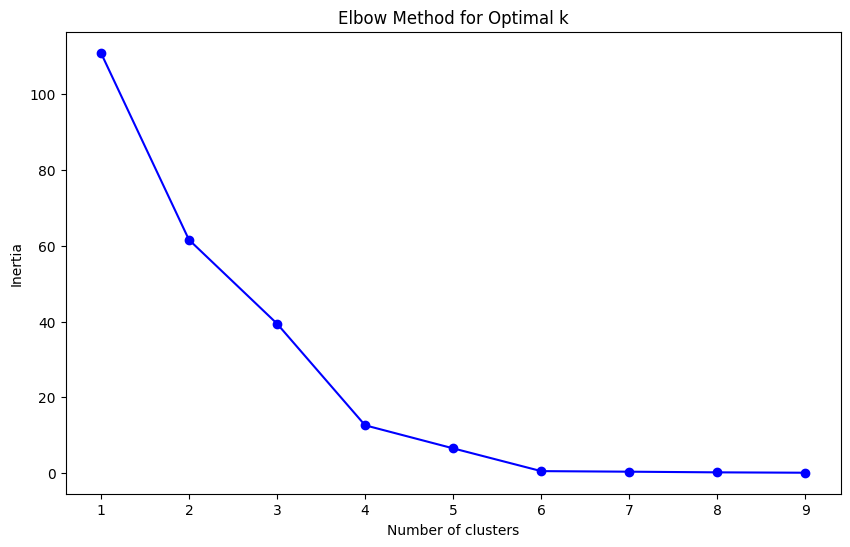

In [489]:
inertia = []
K = range(1, 10)  # You can adjust the range as needed
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled_kmeans)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [490]:
# Assume the optimal k is found to be 4 (this is just an example; you should choose the k from your elbow plot)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm_customer_segment['Cluster_kmeans'] = kmeans.fit_predict(rfm_scaled_kmeans)

# View the centroids of each cluster
cluster_centers = kmeans.cluster_centers_
print(scaler.inverse_transform(cluster_centers))  # If you want to see the original scale


[[136.14285714   1.          32.10857143]
 [ 12.66666667   2.          56.        ]
 [ 20.           3.          84.        ]
 [ 12.30769231   1.          32.70769231]]


In [491]:
cluster_sizes = rfm_customer_segment['Cluster_kmeans'].value_counts()
print(cluster_sizes)

Cluster_kmeans
0    14
3    13
1     9
2     1
Name: count, dtype: int64


In [492]:
cluster_labels = {
    0: 'Churned',
    1: 'Potential Loyalists',
    2: 'VIPs',
    3: 'New Customers',
}

rfm_customer_segment['Cluster_Kmeans_Label'] = rfm_customer_segment['Cluster_kmeans'].apply(lambda x: cluster_labels[x])
rfm_customer_segment.head()

,Customer ID,Recency,Frequency,Monetary,Customer Segment,churn,churn_proba,churn_risk,Log_Recency,Log_Frequency,Log_Monetary,Cluster_heir,Cluster_Heir_Label,Cluster_kmeans,Cluster_Kmeans_Label
0,7575269212427,142.0,1,28.00,Churned,1,1.00,High Risk,4.962845,0.693147,3.367296,3,Churned,0,Churned
1,7633574363403,139.0,1,56.00,Churned,1,0.84,High Risk,4.941642,0.693147,4.043051,4,Lapsed Customers,0,Churned
3,7633628659979,1.0,2,56.00,Infrequent High Spender,0,0.00,Very Low Risk,0.693147,1.098612,4.043051,1,VIPs,1,Potential Loyalists
4,7633686921483,20.0,2,56.00,Infrequent High Spender,0,0.00,Very Low Risk,3.044522,1.098612,4.043051,1,VIPs,1,Potential Loyalists
5,7633815929099,139.0,1,57.52,Churned,1,0.76,High Risk,4.941642,0.693147,4.069369,4,Lapsed Customers,0,Churned


In [493]:
rfm_customer_segment

,Customer ID,Recency,Frequency,Monetary,Customer Segment,churn,churn_proba,churn_risk,Log_Recency,Log_Frequency,Log_Monetary,Cluster_heir,Cluster_Heir_Label,Cluster_kmeans,Cluster_Kmeans_Label
0,7575269212427,142.0,1,28.00,Churned,1,1.00,High Risk,4.962845,0.693147,3.367296,3,Churned,0,Churned
1,7633574363403,139.0,1,56.00,Churned,1,0.84,High Risk,4.941642,0.693147,4.043051,4,Lapsed Customers,0,Churned
3,7633628659979,1.0,2,56.00,Infrequent High Spender,0,0.00,Very Low Risk,0.693147,1.098612,4.043051,1,VIPs,1,Potential Loyalists
4,7633686921483,20.0,2,56.00,Infrequent High Spender,0,0.00,Very Low Risk,3.044522,1.098612,4.043051,1,VIPs,1,Potential Loyalists
5,7633815929099,139.0,1,57.52,Churned,1,0.76,High Risk,4.941642,0.693147,4.069369,4,Lapsed Customers,0,Churned
6,7633953292555,20.0,3,84.00,Infrequent High Spender,0,0.00,Very Low Risk,3.044522,1.386294,4.442651,1,VIPs,2,VIPs
8,7634832064779,20.0,2,56.00,Infrequent High Spender,0,0.00,Very Low Risk,3.044522,1.098612,4.043051,1,VIPs,1,Potential Loyalists
11,7643654816011,20.0,2,56.00,Infrequent High Spender,0,0.00,Very Low Risk,3.044522,1.098612,4.043051,1,VIPs,1,Potential Loyalists
12,7655741784331,120.0,1,28.00,Churned,1,1.00,High Risk,4.795791,0.693147,3.367296,3,Churned,0,Churned
14,7680424149259,139.0,1,28.00,Churned,1,1.00,High Risk,4.941642,0.693147,3.367296,3,Churned,0,Churned


In [494]:
rfm_customer_segment.columns

Index(['Customer ID', 'Recency', 'Frequency', 'Monetary', 'Customer Segment',
       'churn', 'churn_proba', 'churn_risk', 'Log_Recency', 'Log_Frequency',
       'Log_Monetary', 'Cluster_heir', 'Cluster_Heir_Label', 'Cluster_kmeans',
       'Cluster_Kmeans_Label'],
      dtype='object')

In [495]:
rfm_segment_final = rfm_customer_segment[['Customer ID', 'churn_proba', 'churn_risk',  'Cluster_Heir_Label',
       'Cluster_Kmeans_Label']]

rfm_segment_final.head()

,Customer ID,churn_proba,churn_risk,Cluster_Heir_Label,Cluster_Kmeans_Label
0,7575269212427,1.00,High Risk,Churned,Churned
1,7633574363403,0.84,High Risk,Lapsed Customers,Churned
3,7633628659979,0.00,Very Low Risk,VIPs,Potential Loyalists
4,7633686921483,0.00,Very Low Risk,VIPs,Potential Loyalists
5,7633815929099,0.76,High Risk,Lapsed Customers,Churned


In [496]:
rfm_segment_final.to_excel('rfm_segment_final.xlsx', index=False)

<Axes: xlabel='Recency', ylabel='Monetary'>

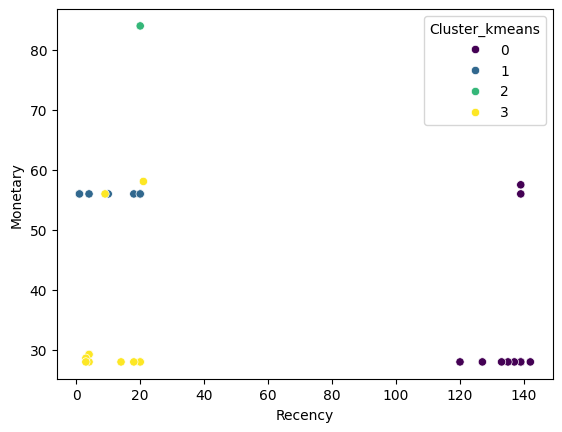

In [497]:
import seaborn as sns
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster_kmeans', data=rfm_customer_segment, palette='viridis')
